In [1]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

In [3]:
fig_path = './figures/'

daily_path = '/home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/'

# Years to load
start = 2007
end = 2015
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Sen', 'Ses']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file(daily_path + 'US-' + x + '_daily_aflx.csv', yrtrim=[start, end])
         for x in sites }
d = pd.Panel(daily)

#hourly_path = '/home/greg/sftp/eddyflux/Ameriflux_files/FLUXNET2015_a/'
hourly_path = '/home/greg/data/rawdata/NMEG/FLUXNET2015_a/'
#hourly = { x : 
#          ld.get_multiyr_aflx( 'US-' + x, hourly_path, gapfilled=True, startyear=start, endyear=end) 
#          for x in sites }

Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Seg_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Sen_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Ses_daily_aflx.csv


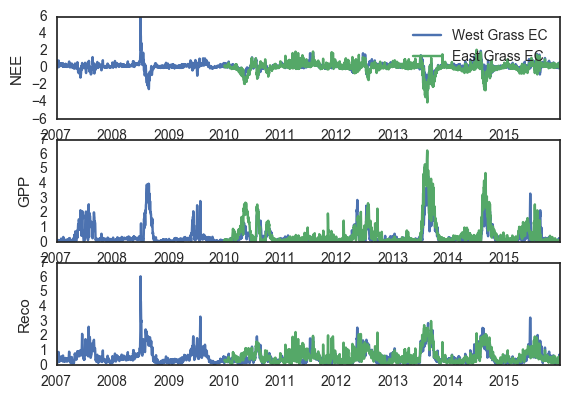

In [85]:
fig1 = plt.figure(figsize=( 6.5, 4.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, d.Seg.FC_F_g_int)
ax.plot(d.Sen.index, d.Sen.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['West Grass EC', 'East Grass EC'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, d.Seg.GPP_g_int)
ax.plot(d.Sen.index, d.Sen.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, d.Seg.RECO_g_int)
ax.plot(d.Sen.index, d.Sen.RECO_g_int)
ax.set_ylabel('Reco')


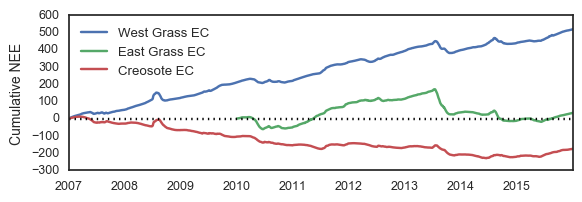

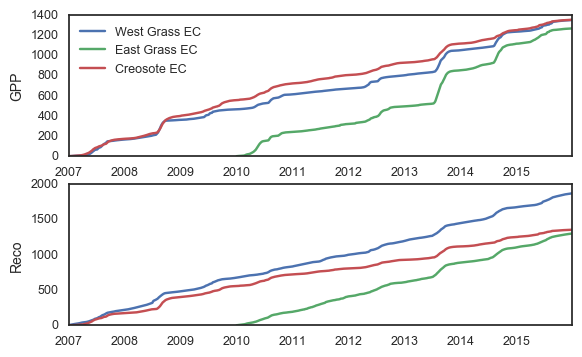

In [172]:
fig2 = plt.figure(figsize=( 6.5, 2 ), dpi=150, facecolor='w', edgecolor='k')
ax = fig2.add_subplot(111)
ax.plot(d.Seg.index, np.cumsum(d.Seg.FC_F_g_int))
ax.plot(d.Sen.index, np.cumsum(d.Sen.FC_F_g_int))
ax.plot(d.Ses.index, np.cumsum(d.Ses.FC_F_g_int))
ax.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax.set_ylabel('Cumulative NEE', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.legend(['West Grass EC', 'East Grass EC', 'Creosote EC'], loc='upper left', fontsize=9.5)

fig2.savefig( fig_path + 'Sev_cumulative_NEE.pdf')

fig3 = plt.figure(figsize=( 6.5, 4 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(2, 1, 1)
ax.plot(d.Seg.index, np.cumsum(d.Seg.GPP_g_int))
ax.plot(d.Sen.index, np.cumsum(d.Sen.GPP_g_int))
ax.plot(d.Ses.index, np.cumsum(d.Ses.GPP_g_int))
ax.set_ylabel('GPP', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.legend(['West Grass EC', 'East Grass EC', 'Creosote EC'], loc='upper left', fontsize=9)

ax = plt.subplot(2, 1, 2)
ax.plot(d.Seg.index, np.cumsum(d.Seg.RECO_g_int))
ax.plot(d.Sen.index, np.cumsum(d.Sen.RECO_g_int))
ax.plot(d.Ses.index, np.cumsum(d.Ses.GPP_g_int))
ax.set_ylabel('Reco', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)

#fig3.savefig( fig_path + 'Sev_cumulative_GPP_RECO.svg')

## Calculate annual EC sums and means

In [126]:
# Create annual sums and means of NEE, etc
gby = d.Seg.groupby(d.Seg.index.year)
ann_sum_Seg = gby.sum()
ann_mean_Seg = gby.mean()
ann_sum_Seg['site'] = 'West Grass EC'
gby = d.Sen.groupby(d.Sen.index.year)
ann_sum_Sen = gby.sum()
ann_mean_Sen = gby.mean()
ann_sum_Sen['site'] = 'East Grass EC'
gby = d.Ses.groupby(d.Ses.index.year)
ann_sum_Ses = gby.sum()
ann_mean_Ses = gby.mean()
ann_sum_Ses['site'] = 'Creosote EC'
ann_sums = pd.concat([ann_sum_Seg, ann_sum_Sen, ann_sum_Ses])
ann_means = pd.concat([ann_mean_Seg, ann_mean_Sen, ann_mean_Ses])
ann_sums['year'] = ann_sums.index
ann_means['year'] = ann_means.index

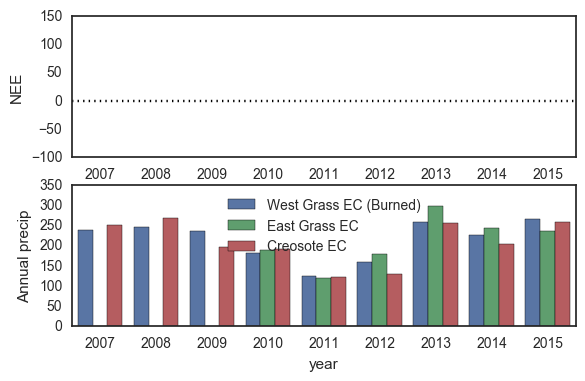

In [25]:
fig4 = plt.figure(figsize=( 6.5, 4 ), dpi=150, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 1, 1)
ax1.plot(ann_sum_Seg.index, ann_sum_Seg.FC_F_g_int)
ax1.plot(ann_sum_Sen.index, ann_sum_Sen.FC_F_g_int)
ax1.plot(ann_sum_Ses.index, ann_sum_Ses.FC_F_g_int)
#sns.barplot(x='year', y='FC_F_g_int', hue='site', data=ann_sums, ax=ax1)
ax1.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax1.set_ylabel('NEE')
#ax1.legend_.remove()
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
sns.barplot(x='year', y='P_F_sum', hue='site', data=ann_sums, ax=ax2)
ax2.legend(loc='best')
ax2.set_ylabel('Annual precip')
ax2.set_ylim([0, 350])

#fig4.savefig( fig_path + 'Sev_grass_annsums.svg')

## 2010-2015 mean of fluxes and precip

In [10]:
mean_sums_10_15 = pd.DataFrame(ann_sum_Seg.loc[2010:2015,:].mean())
mean_sums_10_15.columns = ['GLand']
mean_sums_10_15['New_GLand'] = ann_sum_Sen.loc[2010:2015,:].mean()
mean_sums_10_15['SLand'] = ann_sum_Ses.loc[2010:2015,:].mean()
mean_sums_10_15.loc[['GPP_g_int','RECO_g_int','FC_F_g_int','ET_mm_24hint_0','ET_mm_dayint','PET_mm_dayint','P_F_sum'],:]

,GLand,New_GLand,SLand
GPP_g_int,147.929303,211.583879,133.186346
RECO_g_int,199.475073,217.263421,121.451922
FC_F_g_int,51.545771,5.679542,-11.734424
ET_mm_24hint_0,236.629804,215.836786,224.973022
ET_mm_dayint,224.975547,205.252541,217.362587
PET_mm_dayint,465.227082,481.161220,509.418472
P_F_sum,203.516135,211.421138,194.209492


## 2010-2015 mean of met vars

In [11]:
mean_avg_10_15 = pd.DataFrame(ann_mean_Seg.loc[2010:2015,:].mean())
mean_avg_10_15.columns = ['GLand']
mean_avg_10_15['New_GLand'] = ann_mean_Sen.loc[2010:2015,:].mean()
mean_avg_10_15['SLand'] = ann_mean_Ses.loc[2010:2015,:].mean()
mean_avg_10_15.loc[['TA_F_avg','RH_F_avg','SW_IN_F_avg','PAR_avg','VPD_F_avg'],:]

,GLand,New_GLand,SLand
TA_F_avg,13.683498,13.240454,14.401165
RH_F_avg,39.863013,42.037159,38.210238
SW_IN_F_avg,231.935833,236.743174,235.662415
PAR_avg,497.467491,542.816350,507.238850
VPD_F_avg,1.281541,1.231726,1.340852


## Sevilleta core site productivity data

These are data from ANPP surveys at 4 core sites and there are 2 types of survey:

1. Volume data - see <http://sev.lternet.edu/data/sev-129>
2. Destructive biomass (weights) - see <http://sev.lternet.edu/data/sev-157>

In [12]:
# Core quadrat volume data 
vol_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-129/sev129_nppcorequadrat_20150819.txt")
vol_npp.head()

,year,season,date,site,web,plot,quad,treatment,species,obs,cover,height,count,comment
0,1999,1,2/3/1999,C,1,E,1,C,DAPU7,1,0.50,4,13,NaN
1,1999,1,2/3/1999,C,1,E,1,C,DAPU7,2,0.10,2,16,NaN
2,1999,1,2/3/1999,C,1,E,1,C,GUSA2,1,0.01,4,2,NaN
3,1999,1,2/3/1999,C,1,E,1,C,GUSA2,2,0.10,5,1,NaN
4,1999,1,2/3/1999,C,1,E,1,C,GUSA2,3,0.50,12,1,NaN


In [13]:
# These are the destructive harvest data (weights) used to correlate with volume
wt_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev157_nppweight_20160119_0.txt")
wt_npp.head()

,Year,Season,Date,Site,Treatment,Species,Observation,Count,Cover,Height,Live_Weight,Dead_Weight,Book,Comments
0,1999,1,2/4/1999,C,C,ARDI5,1,1,0.10,14,0.04,-888.0,99-1,NaN
1,1999,1,2/4/1999,C,C,ARDI5,2,1,0.10,14,0.06,-888.0,99-1,NaN
2,1999,1,2/4/1999,C,C,ARDI5,3,1,0.10,21,0.10,-888.0,99-1,NaN
3,1999,1,2/4/1999,C,C,ARDI5,4,1,0.25,20,0.37,-888.0,99-1,NaN
4,1999,1,2/4/1999,C,C,ARDI5,5,1,0.25,20,0.29,-888.0,99-1,NaN


### Core site ANPP data (allometric method) 

see <http://sev.lternet.edu/data/sev-182>

These are ANPP data for the core stes, calculated using the volume and destructive harvest datasets above (using allometric equations). There are 5 webs per core site, though at black grama (G) two were discontinued after the 2009 fire and plots were added to the remaining webs.

For the most part these plots agree with what can be seen in [Esteban Muldavin's 2008 paper](https://dx.doi.org/10.1007/s00442-007-0880-2) for 1999-2004, except that 2004 numbers here are lower. This may be due to missing data or **outliers** (see Methods section of that paper and rudgers paper).

In [14]:
allom_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-182/sev182_nppcorewebbiomass_20150817.txt")
print(np.unique(allom_npp.web)) # There are 5 webs/site, but 2 are discontinued in black grama in 2009 after fire 
print(np.unique(allom_npp.treatment)) # there is only one treatment
allom_npp.head()

[1 2 3 4 5]
['C']


,year,site,treatment,web,plot,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
0,1999,C,C,1,E,1,CHSE7,0.00,0.00,0.05,0.00,0.05,0.05
1,1999,C,C,1,E,1,CHSES,0.00,0.00,0.04,0.00,0.04,0.04
2,1999,C,C,1,E,1,DAPU7,0.12,1.62,2.79,1.49,1.17,2.67
3,1999,C,C,1,E,1,GUSA2,0.79,0.31,18.43,0.00,18.12,18.12
4,1999,C,C,1,E,1,LEFE,0.37,0.17,0.00,0.00,0.00,0.00


B = Blue grama core site
G = Black grama core site
C = Creosote shrub core site

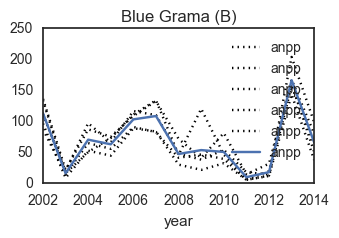

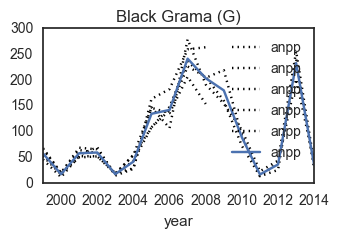

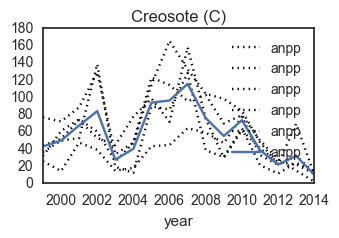

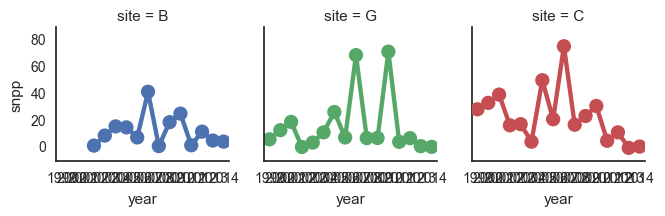

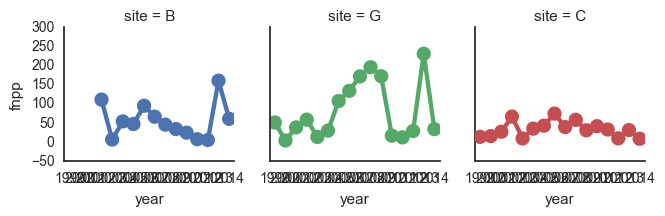

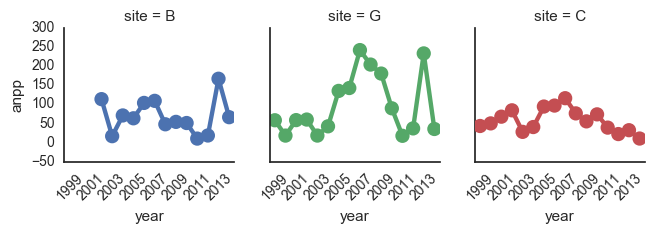

In [24]:
# Run through sites and plot long term npp data and make a dataframe for annual totals
sites = ['B', 'G', 'C']
names = ['Blue Grama (B)', 'Black Grama (G)', 'Creosote (C)']

for i, site in enumerate(sites):
    # Subset by site
    subset = allom_npp[allom_npp.site==site]
    # Rename plot so pandas isn't confused
    subset = subset.rename(columns={'plot':'plotname'})
    # Group by year, web, plot, and quad and sum anpp for all species.
    # This should be total biomass per m2 quad
    gby = subset.groupby(['year', 'web', 'plotname', 'quad'], as_index=False)
    sumanpp = gby.sum()
    #print(sumanpp.head())
    # Group by year and take average of these sums
    gby = sumanpp.groupby('year')
    avganpp = gby.mean()
    avganpp['site'] = site
    avganpp['year'] = avganpp.index
    # Create a dataframe with all sites
    if i==0:
        avganpp_df = avganpp
    else: 
        avganpp_df = pd.concat([avganpp_df, avganpp])
        
    # Group by year and web and take average of these sums
    gby = sumanpp.groupby(['year', 'web'], as_index=False)
    avgwebanpp = gby.mean()
    # Plot individual webs, then the average on top
    plt.figure(figsize=( 3.5, 2 ), dpi=150, facecolor='w', edgecolor='k')
    for j in np.unique(allom_npp.web):
        idx = avgwebanpp.web==j
        plt.plot(avgwebanpp[idx].year, avgwebanpp[idx].anpp, ':k')
    avganpp.anpp.plot()
    #avganpp.snpp.plot()
    #avganpp.fnpp.plot()
    
    plt.legend()
    plt.title(names[i])

# Also look a spring and fall npp along with annual
s = sns.factorplot(x='year',y='snpp', col='site', hue='site', size=2.25, fontsize=6, data=avganpp_df)
f = sns.factorplot(x='year',y='fnpp', col='site', hue='site', size=2.25, fontsize=6, data=avganpp_df)
a = sns.factorplot(x='year',y='anpp', col='site', hue='site', size=2.25, fontsize=6, data=avganpp_df)
a.set_xticklabels([1999,'',2001,'',2003,'',2005,'',2007,'',2009,'',2011,'',2013],rotation=45)
#a.savefig( fig_path + 'Sev_ANPP.svg')

## Deep well (mixed grass) ANPP data

These NPP plots are in the Deep Well area and were set up to compare NPP in a prescribed burn area and a control. The prescribed fire occurred in late 2003 on the East side of the road, and the control plots are on the west side near the deep well met station. There are also burned/unburned shrub NPP data and a burned black grama dataset (control is the black grama core dataset above).

* Volume data for these plots is here: http://sev.lternet.edu/data/sev-156
* and harvest data (weights) come from here again: http://sev.lternet.edu/data/sev-157

The above 2 datasets are used to generate ANPP here: http://sev.lternet.edu/data/sev-185

In [16]:
dw_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-185/sev185_nppburnbiomass_20150814.txt")
dw_npp.head()

,year,site,treatment,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
0,2004,G,B,1,BOER4,0.0,0.45,4.51,0.45,4.06,4.51
1,2004,G,B,1,CHRE4,0.0,0.00,10.26,0.00,10.26,10.26
2,2004,G,B,1,CHSES,0.0,0.00,1.94,0.00,1.94,1.94
3,2004,G,B,1,CRCR3,0.0,18.98,0.00,18.98,0.00,18.98
4,2004,G,B,1,EUEX4,0.0,0.00,0.02,0.00,0.02,0.02


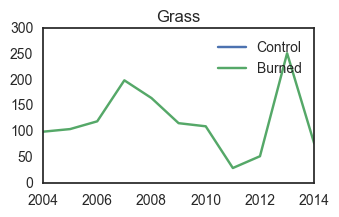

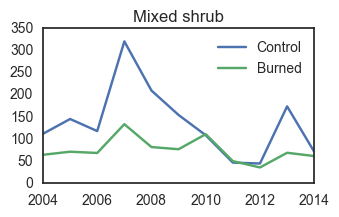

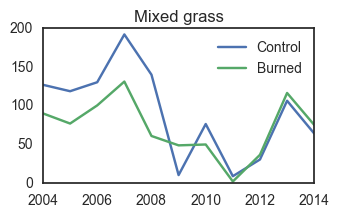

In [87]:
sites = ['G' ,'MS', 'MG']
names = ['Grass', 'Mixed shrub', 'Mixed grass']
for i, site in enumerate(sites):
    # Subset by treatment
    subset = dw_npp[dw_npp.site==site]
    # Group by year, site, treatment, and quad
    gby = subset.groupby(['year', 'site', 'treatment', 'quad'], as_index=False)
    subset = gby.sum()
    gby = subset.groupby(['year', 'site', 'treatment'], as_index=False)
    subset = gby.mean()
    # get control and burned
    dw_npp_c = subset[subset.treatment=='C'].copy()
    dw_npp_b = subset[subset.treatment=='B'].copy()
    # Create a dataframe for the control data
    dw_npp_c['site'] = site
    dw_npp_c.index = dw_npp_c.year
    if i==0:
        dw_npp_c_df = dw_npp_c.copy()
    else: 
        dw_npp_c_df = pd.concat([dw_npp_c_df, dw_npp_c])
    # Plot
    plt.figure(figsize=( 3.5, 2 ), dpi=150, facecolor='w', edgecolor='k')
    plt.plot(dw_npp_c.year, dw_npp_c.anpp)
    plt.plot(dw_npp_b.year, dw_npp_b.anpp)
    plt.legend(['Control', 'Burned'])
    plt.title(names[i])

## Belowground NPP (root ingrowth donuts)

see <http://sev.lternet.edu/data/sev-175>

Based on the method in [Milchunas et al., 2005](http://dx.doi.org/10.1007/s11104-004-0230-7). Some data previously published in [Petrie et al., 2015](http://dx.doi.org/10.1111/gcb.12743).

Note that root weights are in milligrams and the sampled area is calculated as the inner circle area subtracted from the outer

In [32]:
bnpp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev175_rootingrowth_20160127.txt")
print(bnpp.head())
np.unique(bnpp.Site)

   Date Site  Sample  Depth  Volume  Root_Weight Notes
0  2005    F       1   0-15    2650         50.6   NaN
1  2005    F       1  15-30    1500        407.6   NaN
2  2005    F       2   0-15    2750        184.5   NaN
3  2005    F       2  15-30    1750        391.0   NaN
4  2005    F       3   0-15    2550        113.7   NaN


array(['C', 'DW', 'DWB', 'F', 'M'], dtype=object)

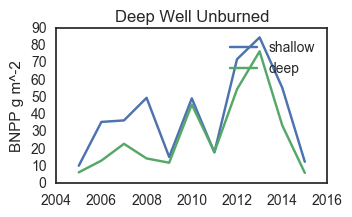

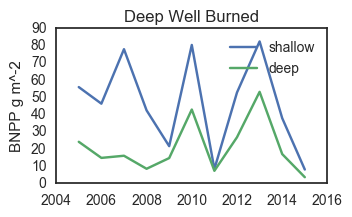

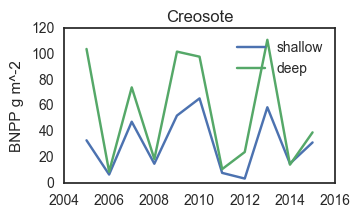

In [88]:
sites = ['DW', 'DWB', 'C']
names = ['Deep Well Unburned', 'Deep Well Burned', 'Creosote']

# Calculate the area basis for the measurements
import math
samplearea = (math.pi * (20.9/2)**2) - (math.pi * (15.2/2)**2)

for i, site in enumerate(sites):
    # Subset by site
    subset = bnpp[bnpp.Site==site]
    # Group by year, site, and depth
    gby = subset.groupby(['Date', 'Site', 'Depth'], as_index=False)
    subset = gby.mean()
    subset['root_gm2'] = subset.Root_Weight/1000 * 10000/samplearea

    # get deep and shallow
    bnpp_s = subset[subset.Depth=='0-15']
    bnpp_d = subset[subset.Depth=='15-30']
    #print(bnpp_s.head())
    #print(bnpp_d.head())
    
    # Subset by sample, then sum, then group by date/site and mean
    subset2 = bnpp[bnpp.Site==site]
    # Group by year, site, and depth
    gby = subset2.groupby(['Date', 'Site', 'Sample'], as_index=False)
    subset2 = gby.sum()
    #print(subset2.head())
    subset2['root_gm2'] = subset2.Root_Weight/1000 * 10000/samplearea
    gby = subset2.groupby(['Date', 'Site'], as_index=False)
    bnpp_0_30 = gby.mean()
    #print(bnpp_0_30.head())

    if i==0:
        bnpp_0_30_df = bnpp_0_30
    else: 
        bnpp_0_30_df = pd.concat([bnpp_0_30_df, bnpp_0_30])
        
    # Plot
    figx = plt.figure(figsize=( 3.5, 2 ), dpi=150, facecolor='w', edgecolor='k')
    plt.plot(bnpp_s.Date, bnpp_s.root_gm2)
    plt.plot(bnpp_d.Date, bnpp_d.root_gm2)
    plt.legend(['shallow', 'deep'])
    plt.title(names[i])
    plt.ylabel('BNPP g m^-2')

### Notes from  meeting with Scott

* East Grass had a prescribed burned in 2003, most recently, but there were 2 smaller preceeding fires in the area, one in 2001 and one in 1995. The area burned in 1995 reburned in 2003, but the area burned in 2001 did not reburn in 2003. There are some line intercept transects that were measured from 1995 to 2012. The north end of these transects are in the 1995 burn area, and the south ends of them are in the 2001 fire area (not reburned), so the south end should have a community composition recovery history from 2001 to 2012 that could be compared to the core site transects across the road (measured 1989 to 2015).
    
* Look at old Seg data (pre-2007, Kurc and Small)
    
* There is also a mixed grass burned ANPP dataset from the monsoon project on the west side of the road. These may show some indication of recovery from the fire.

## Combined NEE and NPP data

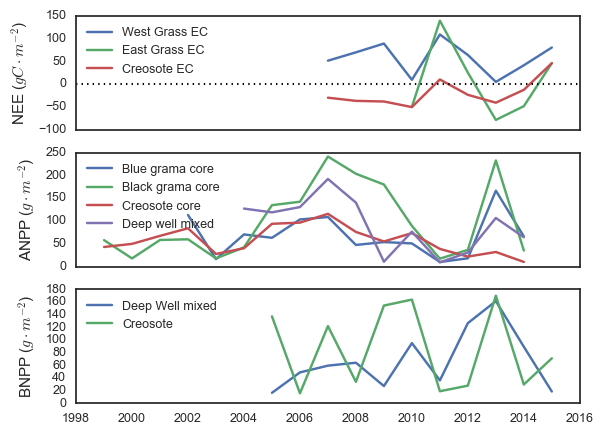

In [171]:
fig4 = plt.figure(figsize=( 6.5, 5 ), dpi=150, facecolor='w', edgecolor='k')
ax1 = plt.subplot(3, 1, 1)
ax1.plot(ann_sum_Seg.index, ann_sum_Seg.FC_F_g_int, label='West Grass EC')
ax1.plot(ann_sum_Sen.index, ann_sum_Sen.FC_F_g_int, label='East Grass EC')
ax1.plot(ann_sum_Ses.index, ann_sum_Ses.FC_F_g_int, label='Creosote EC')
ax1.legend(loc='best',fontsize=9)
ax1.axhline(y=0, xmin=0, xmax=1, ls=':', lw=1.5, color='k')
ax1.set_ylabel('NEE ($gC \cdot m^{-2}$)')
ax1.tick_params(axis='y', which='major', labelsize=9)
ax1.label_outer() 

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
idx = avganpp_df.site=='B'
ax2.plot(avganpp_df[idx].index, avganpp_df[idx].anpp, label='Blue grama core')
idx = avganpp_df.site=='G'
ax2.plot(avganpp_df[idx].index, avganpp_df[idx].anpp, label='Black grama core')
idx = avganpp_df.site=='C'
ax2.plot(avganpp_df[idx].index, avganpp_df[idx].anpp, label='Creosote core')
idx = dw_npp_c_df.site=='MG'
ax2.plot(dw_npp_c_df[idx].index, dw_npp_c_df[idx].anpp, label='Deep well mixed')
ax2.legend(loc='best',fontsize=9)
ax2.set_ylabel('ANPP ($g \cdot m^{-2}$)')
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.label_outer() 

ax3 = plt.subplot(3, 1, 3, sharex=ax1)
idx = bnpp_0_30_df.Site=='DW'
ax3.plot(bnpp_0_30_df[idx].Date, bnpp_0_30_df[idx].root_gm2, label='Deep Well mixed')
idx = bnpp_0_30_df.Site=='C'
ax3.plot(bnpp_0_30_df[idx].Date, bnpp_0_30_df[idx].root_gm2, label='Creosote')
ax3.legend(loc='best',fontsize=9)
ax3.set_ylabel('BNPP ($g \cdot m^{-2}$)')
ax3.tick_params(axis='both', which='major', labelsize=9)

fig4.savefig( fig_path + 'Sev_NEE_NPP_annsums.pdf')

# Flux uncertainty

In [91]:
eddyproc_path = hourly_path + 'eddyproc_out/'
seg_unc = ld.get_multiyr_eddyproc('US-Seg', eddyproc_path, startyear=2007, endyear=2015)
sen_unc = ld.get_multiyr_eddyproc('US-Sen', eddyproc_path, startyear=2010, endyear=2015)
ses_unc = ld.get_multiyr_eddyproc('US-Ses', eddyproc_path, startyear=2007, endyear=2015)

Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2007.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2008.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2009.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2010.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2011.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2012.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2013.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2014.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Seg/DataSetafterFluxpart_2015.txt
Parsing /home/greg/data/rawdata/NMEG/FLUXNET2015_a/eddyproc_out/US-Sen/DataSetafterFluxpart

In [92]:
hourly_unc = hourly.copy()
hourly_unc['Seg'] = hourly_unc['Seg'].join(seg_unc.NEE_fs_unc) 
hourly_unc['Sen'] = hourly_unc['Sen'].join(sen_unc.NEE_fs_unc)
hourly_unc['Ses'] = hourly_unc['Ses'].join(ses_unc.NEE_fs_unc)
hourly_unc['Seg'].columns

Index(['YEAR', 'DTIME', 'TA_F', 'TA_F_FLAG', 'RH_F', 'RH_F_FLAG', 'VPD_F',
       'VPD_F_FLAG', 'SW_IN_F', 'SW_IN_F_FLAG', 'P_F', 'P_F_FLAG', 'LW_IN_F',
       'LW_IN_F_FLAG', 'RNET_F', 'RNET_F_FLAG', 'USTAR', 'WD', 'WS', 'PA',
       'PAR', 'SW_OUT', 'LW_OUT', 'FC_F', 'FC_F_FLAG', 'LE_F', 'LE_F_FLAG',
       'H_F', 'H_F_FLAG', 'CO2', 'H2O', 'GPP', 'RECO', 'NEE_fs_unc'],
      dtype='object')

### Mean site uncertainty in NEE

In [112]:
# Sum in quadrature (sqrt of summed squared uncertainty values)
hourly_unc['Seg']['NEE_fs_unc_sq'] = hourly_unc['Seg'].NEE_fs_unc**2
gby = hourly_unc['Seg'].NEE_fs_unc_sq.groupby(hourly_unc['Seg'].index.year)
seg_unc = np.sqrt(gby.sum())
seg_unc = seg_unc[0:9]
seg_unc.mean()


72.500507334076147

In [127]:
hourly_unc['Sen']['NEE_fs_unc_sq'] = hourly_unc['Sen'].NEE_fs_unc**2
gby = hourly_unc['Sen'].NEE_fs_unc_sq.groupby(hourly_unc['Sen'].index.year)
sen_unc = np.sqrt(gby.sum())
sen_unc = sen_unc[0:6]
sen_unc.mean()

92.185367965455427

In [117]:
# Sum in quadrature (sqrt of summed squared uncertainty values)
hourly_unc['Ses']['NEE_fs_unc_sq'] = hourly_unc['Ses'].NEE_fs_unc**2
gby = hourly_unc['Ses'].NEE_fs_unc_sq.groupby(hourly_unc['Ses'].index.year)
ses_unc = np.sqrt(gby.sum())
ses_unc = ses_unc[0:9]
ses_unc.mean()

59.746047002411586

In [128]:
# Show that uncertainty spans 0 cumulative NEE line in most years
new = pd.concat([ann_sum_Seg, ann_sum_Sen, ann_sum_Ses])
new['year'] = new.index
new['year+']= new.index + 0.4
new['mdv_sd'] = 0
#new = pd.melt(new, id_vars=['year', 'site'], value_vars=['FC_F_g_int', 'P_F_sum'])
print(new)

       GPP_g_int  RECO_g_int  FC_F_g_int  ET_mm_24hint_0    P_F_sum  \
2007  165.220029  216.708110   51.488081      321.082524  240.48900   
2008  195.789171  265.591007   69.801836      264.924167  245.97754   
2009  104.925142  193.983662   89.058519      229.137320  236.77201   
2010  148.412859  157.976292    9.563432      255.581741  181.33789   
2011   57.833189  166.820059  108.986870      154.073180  125.76481   
2012  131.042782  195.023292   63.980511      205.047828  160.29694   
2013  248.724788  253.704330    4.979542      250.465791  259.29717   
2014  185.193235  226.589136   41.395900      285.654025  227.80000   
2015  116.368962  196.737329   80.368367      268.956258  266.60000   
2007         NaN         NaN         NaN             NaN        NaN   
2008         NaN         NaN         NaN             NaN        NaN   
2009         NaN         NaN         NaN             NaN        NaN   
2010  240.974836  191.345425  -49.629412      234.237482  189.22342   
2011  

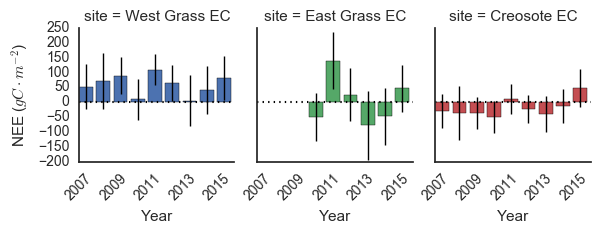

In [173]:
new.loc[new.site=='Creosote EC', 'mdv_sd'] = ses_unc
new.loc[new.site=='West Grass EC', 'mdv_sd'] = seg_unc
new.loc[new.site=='East Grass EC', 'mdv_sd'] = sen_unc
#print(new)

with sns.plotting_context(font_scale=.7):
    g = sns.FacetGrid(new, col="site", hue="site", size=2.25, aspect=.9)
g = g.map_dataframe(plt.plot, [2007,2016], [0,0], ':', color='k', lw=1.5)
g = g.map(plt.errorbar, "year+", "FC_F_g_int", "mdv_sd", marker='', lw=1, color='k', ls='None')
g = g.map(plt.bar, 'year', 'FC_F_g_int')
g = g.set_xticklabels([2007,'',2009,'',2011,'',2013,'', 2015],rotation=45)
g = g.set_axis_labels("Year", "NEE ($gC \cdot m^{-2}$)")
#g = g.map(plt.errorbar, "year+", "FC_F_g_int", "mdv_sd", marker='', c='k', ls='None')


g.savefig( fig_path + 'Sev_grass_annsums_mdvUnc.pdf')